In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 

import mdtraj as md

import numpy as np
from tqdm import tqdm
from pathlib import Path
import os
from natsort import natsorted

In [12]:
f_dunbrack = [d for d in Path('./ftraj_egfr/').glob('run*-clone*_dunbrack.npy')]
f_dunbrack = natsorted(f_dunbrack)

In [15]:
traj_lengths = [np.load(path).shape[0] for path in f_dunbrack]

In [44]:
print(f'{np.sum(traj_lengths)/1000000} ms')

36.635996 ms


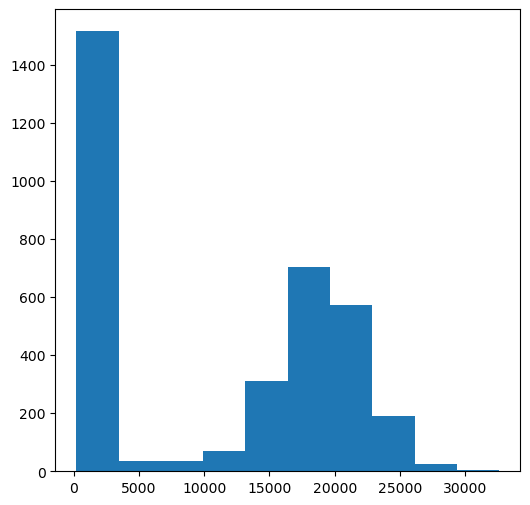

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
_, _, _ = ax.hist(traj_lengths)

In [38]:
# d1 = dist(αC-Glu(+4)-Cα, DFG-Phe-Cζ)
# d2 = dist(β3-Lys-Cα, DFG-Phe-Cζ)
# The backbone dihedrals of X-DFG (residue before conserved Asp, Thr), DFG-Asp, DFG-Phe;
# and the side chain dihedral (χ1) of DFG-Phe

f_trajs = {}

for f in tqdm(f_dunbrack, total=len(f_dunbrack)):
    f_traj = np.load(f) 
    title = f.stem.split('_')[0]
    f_trajs[title] = f_traj 

100%|██████████████████████████████████████████████████████████████| 3462/3462 [00:01<00:00, 1958.51it/s]


In [48]:
lists = [[] for _ in range(9)]
for array in tqdm(f_trajs.values(), total=len(f_trajs.values())):
    for i in range(9):
        lists[i].extend(array[:, i])

100%|███████████████████████████████████████████████████████████████| 3462/3462 [00:11<00:00, 303.83it/s]


In [61]:
dist_1 = np.array(lists[0])
dist_2 = np.array(lists[1])
phi_thr = np.array(lists[2])
phi_asp = np.array(lists[3])
phi_phe = np.array(lists[4])
psi_thr = np.array(lists[5])
psi_asp = np.array(lists[6])
psi_phe = np.array(lists[7])
chi_phe = np.array(lists[8])

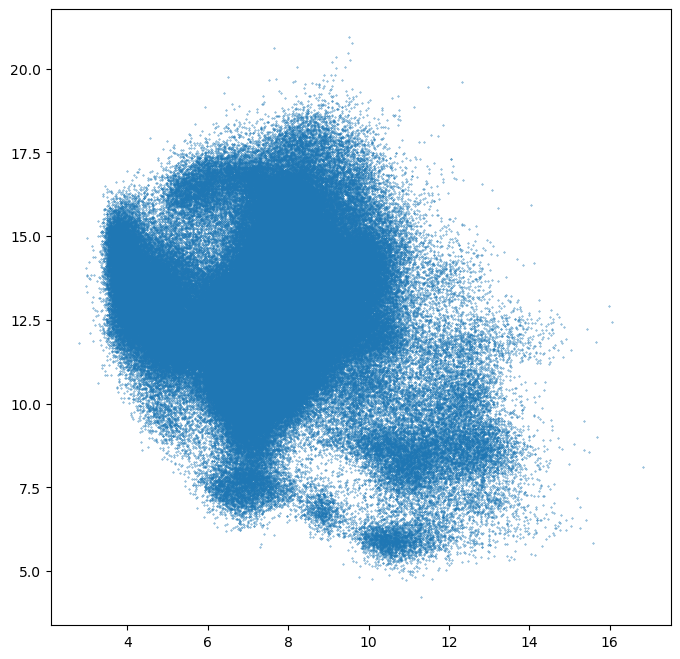

In [62]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(dist_1[::100]*10, dist_2[::100]*10, s=0.1)
# ax.set_xlim([0, 2])
# ax.set_ylim([0, 2])